# DDoS Classification Model

## LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


## DATA LOADING

In [3]:
path = r'C:\Users\tan\Documents\final_dataset'

In [5]:
data = pd.read_csv(path + '\_final_dataset.csv')

In [11]:
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max    

## DATA FEATURING

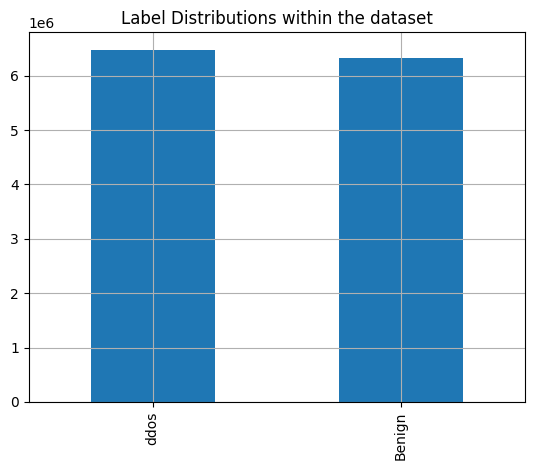

In [10]:
data["Label"].value_counts().plot(kind='bar')
plt.title('Label Distributions within the dataset')
plt.grid()
plt.show()

## TIME INTELLIGENCE

In [24]:
#Get the entire hour to time analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 
data['Hour'] = data['Timestamp'].dt.hour
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour,Year,Month
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,2010-12-06 08:34:32,3974862,29,...,0.0,0.0,0.0,0.0,0.0,0.0,ddos,8,2010,12
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,2010-12-06 08:34:36,63,1,...,0.0,0.0,0.0,0.0,0.0,0.0,ddos,8,2010,12
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,2010-12-06 08:34:36,476078,2,...,0.0,0.0,0.0,0.0,0.0,0.0,ddos,8,2010,12
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,2010-12-06 08:34:37,151,2,...,0.0,0.0,0.0,0.0,0.0,0.0,ddos,8,2010,12
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,2010-12-06 08:34:37,472507,2,...,0.0,0.0,0.0,0.0,0.0,0.0,ddos,8,2010,12


In [25]:

data['Year'].value_counts()

2018    12317140
2017      423931
2010       53556
Name: Year, dtype: int64

In [26]:
data['Month'].value_counts()

2     12317140
3       352287
4        71644
12       44208
6         9348
Name: Month, dtype: int64

<span style="background-color: yellow;
padding: 2px 5pc;
border-radius: 3px;
font-weght: bold;">Important Data

Note that in the months and years, ther are not continuity, it could means or implicate errors while data extraction from sources, or even when consolidating information in a full file

In [29]:
pivot = pd.pivot_table(data = data[data.Label == 'ddos'],
                       index=('Year','Hour'),
                       #columns=('Protocol'),
                       values = ('Protocol'),
                       aggfunc=(np.count_nonzero)
                       ).reset_index()
pivot

,Year,Hour,Protocol
0,2010,0,3883
1,2010,1,833
2,2010,2,292
3,2010,3,850
4,2010,4,1114
5,2010,5,920
6,2010,6,521
7,2010,7,716
8,2010,8,477
9,2010,9,3273


2010
2018


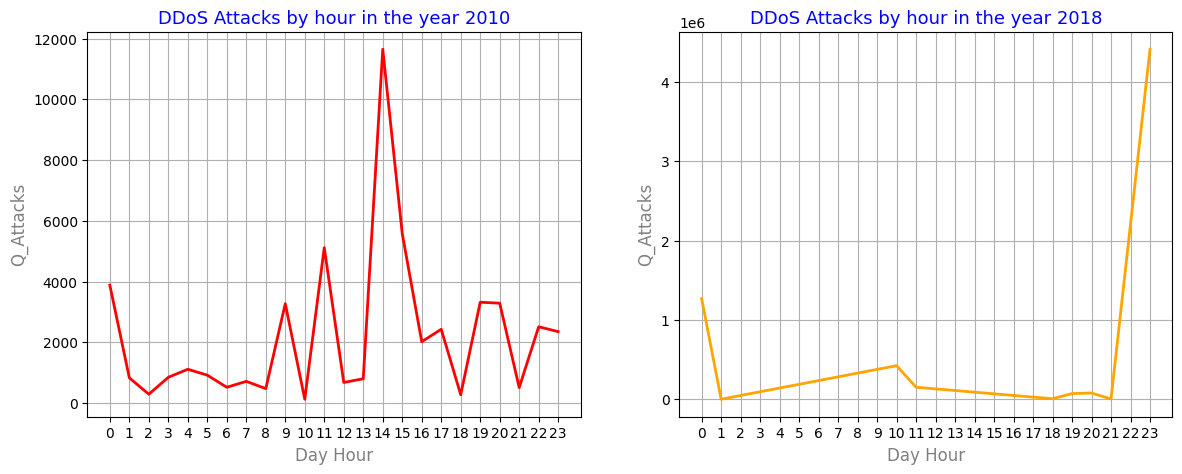

In [44]:
pivot = pd.pivot_table(data = data[data.Label == 'ddos'],
                       index=('Year','Hour'),
                       #columns=('Protocol'),
                       values = ('Protocol'),
                       aggfunc=(np.count_nonzero)
                       ).reset_index()

pivot.rename(columns={'Protocol':'Q_Attacks'}, inplace=True)

#Figure config
plt.figure(figsize=(14,5))

colors = ['red','orange','purple']
years = list(pivot['Year'].unique())
years = ['sad','ddd']

for i, year in enumerate(pivot['Year'].unique()):
    print(year)
    temp = pivot[pivot.Year == year]
    plt.subplot(1,2,i+1)
    plt.plot(temp['Hour'], temp['Q_Attacks'],linewidth =2, color = colors[i])
    plt.title('DDoS Attacks by hour in the year '+ str(year) , fontsize = 13, color = 'blue')
    plt.xlabel('Day Hour', fontsize = 12, color = 'gray')
    plt.ylabel('Q_Attacks', fontsize = 12, color = 'gray')
    plt.xticks(np.arange(24))
    plt.grid()


plt.show()


<br> Note: <br/> The attacking time was dramatically changed within 2010 and 2018